In [1]:
import numpy as np
from astroquery.mast import Catalogs
from astroquery.mast import Tesscut
from astroquery.mast import Observations
from astropy.wcs import WCS
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
#Insert TIC ID and BJD
tic_id = '167602025'
bjd = 2458335.233
sector = '1'
tbjd = bjd - 2457000.00


def dload_url (tic_id, sector): #Dowloads URL through query for general 2-minute cadence data given TIC ID and Sector
    
    obsTable = Observations.query_criteria(
        obs_collection = "HLSP", project = "TESS",
        dataproduct_type = ["timeseries"],
        target_name = tic_id,
        sequence_number=sector)
    products = Observations.get_product_list(obsTable)
    manifest = Observations.download_products(products, extension = "fits")
    return manifest

def gen_url(tic_id, sector, cadence, version): #Generates URL for TASOC data given TIC ID, Sector, Cadence, and Version
    tic_id_1 = tic_id.zfill(16)
    tic_id_2 = tic_id.zfill(11)
    if (cadence == '1800'):
        sub_dir = "ffi"
    else: 
        sub_dir = "tpf"
    cadence = cadence.zfill(4)
    
    url = "http://archive.stsci.edu/hlsps/tasoc/s000" + str(sector) + "/" + sub_dir + "/" \
            + tic_id_1[0:4] + "/" + tic_id_1[4:8] + "/" + tic_id_1[8:12] + "/" + tic_id_1[12:16] + "/"\
            + "hlsp_tasoc_tess_" + sub_dir + "_tic" + tic_id_2 + "-s0" + str(sector) + "-c" + cadence + "_tess_"\
            + version + "_lc.fits"
    return url

In [90]:
manifest = dload_url(tic_id, sector)
fits_lc = manifest[0][0]
#print(gen_url(tic_id, sector, '1800', 'v01'))
#fits_lc = gen_url(tic_id, sector, '1800', 'v04')
fits.info(fits_lc)
fits.getdata(fits_lc, ext=1)

INFO: Found cached file ./mastDownload/HLSP/hlsp_tasoc_tess_ffi_tic00167602025-s01-c0120_tess_v04_lc/hlsp_tasoc_tess_ffi_tic00167602025-s01-c0120_tess_v04_lc.fits with expected size 1877760. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_tasoc_tess_ffi_tic00167602025-s01-c1800_tess_v04_lc/hlsp_tasoc_tess_ffi_tic00167602025-s01-c1800_tess_v04_lc.fits with expected size 161280. [astroquery.query]
Filename: ./mastDownload/HLSP/hlsp_tasoc_tess_ffi_tic00167602025-s01-c0120_tess_v04_lc/hlsp_tasoc_tess_ffi_tic00167602025-s01-c0120_tess_v04_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      47   ()      
  1  LIGHTCURVE    1 BinTableHDU     88   19261R x 14C   [D, E, J, D, D, D, D, D, J, J, D, D, D, D]   
  2  SUMIMAGE      1 ImageHDU        29   (11, 11)   float64   
  3  APERTURE      1 ImageHDU        29   (11, 11)   int32   


FITS_rec([(1325.29375723, -0.00060541, 70444, 7577.31005859, 12.01934433, 3289.01538086, nan, nan, 0, 8, 1918.75382763, 1015.87104801,         nan,         nan),
          (1325.29514611, -0.00060542, 70445, 7553.89794922, 12.02351761, 3317.05371094, nan, nan, 0, 0, 1918.80189573, 1015.92822877, -0.04481367, -0.01285106),
          (1325.296535  , -0.00060543, 70446, 7598.87255859, 12.02742195, 3287.09375   , nan, nan, 0, 0, 1918.82069333, 1015.96220175, -0.01887261,  0.01837436),
          ...,
          (1353.17285472, -0.00066344, 90517, 7522.99511719, 12.22473049, 3762.38623047, nan, nan, 0, 0, 1918.82428118, 1015.85838019, -0.01646267, -0.08952453),
          (1353.1742436 , -0.00066345, 90518, 7527.84179688, 12.22674942, 3769.78027344, nan, nan, 0, 0, 1918.82786357, 1015.8850953 , -0.0100801 , -0.05873123),
          (1353.17563248, -0.00066346, 90519, 7512.828125  , 12.21453667, 3761.91015625, nan, nan, 0, 0, 1918.8194783 , 1015.85902087, -0.01719231, -0.08671916)],
         dty

In [110]:
#Stores HDU data into variables for plotting
with fits.open(fits_lc, mode="readonly") as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    sap_fluxes = hdulist[1].data['FLUX_BKG']
    pdcsap_fluxes = hdulist[1].data['FLUX_RAW']

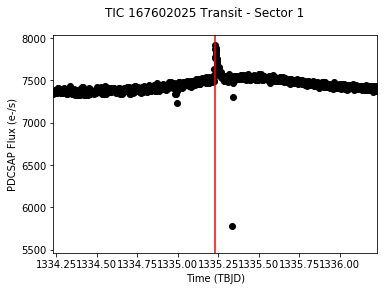

In [113]:
#PLOT LIGHT CURVE
t0 = tbjd #transit time

fig, ax = plt.subplots()

ax.plot(tess_bjds, pdcsap_fluxes, 'ko')

ax.set_xlim(t0-1.0, t0+1.0)


ax.axvline(x=t0, color = 'red')

fig.suptitle("TIC " + str(tic_id) + " Transit - Sector " + str(sector))
ax.set_ylabel("PDCSAP Flux (e-/s)")
ax.set_xlabel("Time (TBJD)")

plt.subplots_adjust(left=0.15)
plt.show()

In [87]:
import numpy as np
import pandas as pd

In [114]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [116]:
outlier_datapoints = detect_outlier(pdcsap_fluxes)
print(outlier_datapoints)

[]
